# Lab05 — A bit about Python objects, classes, and instances

## Objects: classes and instances

You're probably aware that most computer languages (particularly those supporting scientific computing) have different **types** of variables, e.g., integers, floating-point numbers ("floats," to represent real numbers), strings, arrays.  Besides holding different kinds of data, different data types also support different types of operations.  Integers and floats support math operations, but strings typically don't. Strings and arrays support indexing, but floats don't.

Object-oriented programming (OOP) generalizes the notion of a data type to something more powerful and general called an **object**. 

An object is a data structure meant to represent something that has both **state** (values stored in memory) and **behavior** (associated functions or operations). It provides a kind of bundle of data and instruction code.

Both the state and behavior are accessed via **attributes** of the object—names appended to the object's variable name with a dot separator:  *name.attribute*.

There are two types of attributes:
* **Data** attributes implement state and are accessed simply by name:

In [1]:
from numpy import *  # handy interactively; avoid in reusable modules

In [2]:
a = array([0,1,2])
a.shape  # returns a list lengths of each dimension of an array

(3,)

In [3]:
a.dtype

dtype('int64')

*Sequence* or *mapping* data are accessed by the *item* interface, i.e., using square brackets and an integer or slice (for a sequence) or a keyword (for a map).

In [4]:
a[0]

0

In [5]:
a[0:2]

array([0, 1])

In [6]:
# A dictionary is a mapping:
d = dict(key1="hello", key2=42)
print('The answer is', d['key2'])

The answer is 42


* **Methods** implement behavior and are accessed much like a function call:

In [8]:
b = a.copy()  # arrays have a copy() method
b[1] = 12
a, b

(array([0, 1, 2]), array([ 0, 12,  2]))

In [9]:
b.max()

12

In [10]:
print(a, 'dot', b)
a.dot(b)  # like a vector dot product

[0 1 2] dot [ 0 12  2]


16

In Python, pretty much everything is an object and has a directory of attributes (names accessing different resources associated with the object):

In [11]:
# Even the integer 1 is an object (instance):
dir(1)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

In [12]:
# Ints have methods:
i = 1
i.bit_length()  # number of bits needed to represent the number

1

In [13]:
# A float object:
dir(1.)

['__abs__',
 '__add__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getformat__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__set_format__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 'as_integer_ratio',
 'conjugate',
 'fromhex',
 'hex',
 'imag',
 'is_integer',
 'real']

In [20]:
f = 1.
print('Integer-valued?', f.is_integer())
?f.hex
print('Hex repn:', f.hex())

Integer-valued? True
Hex repn: 0x1.0000000000000p+0


A **class** is like a *template* for creating new objects with a specific set of data and method attributes. In Python, **type** is a synonym for **class** (i.e., every "data type"—such as ints and floats—is actually a class, defining both state and behavior for objects created—**instantiated**—using the class).

In [22]:
class TwoNumbers:
    """
    A simple container class that doesn't do much:  It stores
    two numbers and their product, and provides a method to
    raise the product to a power.
    
    Every class should have a docstring!
    """
    
    # "Magic" method names have "__" on each side and are
    # automatically invoked under specific circumstances.
    # __init__ is invoked to create an instance of the class.
    
    def __init__(self, a, b):  # self is an IMPLICIT 1st argument
        """
        Store two numerical values, and their product.
        """
        self.a = a
        self.b = b
        self.ab = a*b
    
    def prod_pow(self, n):
        """
        Return the product raised to the power n.
        """
        return self.ab**n

In [23]:
tn1 = TwoNumbers(1,2)
tn2 = TwoNumbers(3,4)

In [25]:
tn1.a, tn1.ab

(1, 2)

In [26]:
tn2.prod_pow(2)

144

Why **self**?

The class keeps a single copy of the instructions defining object behavior (methods).

**Instantiating** a class creates a new object (an **instance**) based on the class, allocating a unique chunk of memory for that particular object's data, with the chunk pointing back to the class for the methods.  *self* is a label for the instance's data block; it lets the (shared) class method code access the data for a particular instance.

This is an example of *explicit is better than implicit* (from that quirky built-in `this`, module—try `import this` if you forgot about it!).  Other object-oriented languages sometimes adopt conventions letting you avoid *self*, but this can be a cause of bugs.

Here's a rough picture of how classes and instances are related:

![Class and instances](class+instances.png "Class and instances")

## A simple class:  Production line failure problem

Here we do a simple discrete-hypotheses, discrete-data problem much like the coin flipping problem done in Lec04 (with three hypotheses about $\alpha$, the probability for heads or success).

We computed probabilities numerically for that problem in a Jupyter notebook, using (global) variables to store problem info (priors, data), and a function to compute likelihoods. To treat different cases, we modified global variables, and then re-ran the whole notebook, comparing new results to previous ones by memory.

Here we'll solve a related problem, but implement the calculations using a Python class. Class instances will serve as isolated "containers" that let us handle multiple cases all together in a notebook.

### Problem setup

Consider a production line producing batches of [widgets](https://en.wikipedia.org/wiki/Widget_(economics)) (given recent past events, I'm tempted to use fidget spinners instead of widgets, but I'll resist the temptation!).

When the production line works properly (the *nominal* state), it produces widgets with a small defect rate, $\alpha$ (known from past measurements).

Sometimes the production line suffers an internal partial failure on startup, and produces widgets with a larger defect rate, $\beta$ (also known from past measurements).

Historical data indicates that the probability of failure on startup is $f$ (also known).

The production line is started and produces a batch of $N$ widgets, $n_d$ of them defective.

**_What is the posterior probability that the production line operated in the failure mode?_**

### Likelihood function

You may have noticed that the problem isn't fully specified. In particular, it's not obvious what rules governed the run producing the data. Here are two possibilities:

* Run the line to produce some target number of widgets, $N$. Count the number of defects among those $N$ widgets.
* Run the line to meet an order for $m$ good widgets, testing widgets as the line runs.

These two production strategies correspond to different likelihood functions:

* For the first, $N$ is fixed, and $n_f$ is a random number. You can probably see that the sampling distribution for $n_f$ is a multinomial distribution.
* For the second, $m$ is fixed, and $N$ is a random number; the number of failures is $n_f = N-m$.

What's the sampling distribution in the second case? For the purpose of determining whether the production line failed, does it matter which strategy was used?

### Posterior probabilities

Compute the posterior probabilities for $H_0 = $ nominal state and $H_1 =$ failure mode by filling out a probability table like this:

| Hypothesis | Prior | Likelihood | Prior $\times$ Likelihood | Posterior |
|------------|-------|------------|---------------------------|-----------|
| H_0        |       |            |                           |           |
| H_1        |       |            |                           |           |
| Sum        | 1     | NA         |                           |     1     |

(You'll probably need more room than that—do it on paper or a whiteboard.)

The formulas aren't very illuminating, so let's compute the probabilities numerically for various cases.

The accompanying Python source file, `machine_failure.py`, can be used as either a script (run at the command line) or a module (imported into other Python code, or a notebook). It defines a Python class doing the necessary calculations in two ways:

* Computing probabilities directly;
* Computing logarithms of probabilities for intermediate steps.

Ideally, these approaches should always give the same results.  But for large samples Bayesian calculations can involve summing and computing ratios of very small probabilities, smaller than floating point precision can represent. So most Bayesian codes work with logarithms of probabilities as much as possible. This won't be important for the cases we'll treat here, but it's good to get used to thinking about log-probabilities for statistical computation.

Have a look at the file.  It defines a Python class, `MachineFailure`, and some test functions.

At the end, it uses the class to run some example cases. These are in a special block indicating these are meant to be computed when the file is run as a script at the command line (with a `python` or `ipython` command), but not when the file is imported as a module.  The block starts like this:

```python
`if __name__ == '__main__'`:
    ...
```

You can also run scripts in a Jupyter notebook with the `%run` magic command: 

In [31]:
%run machine_failure.py

MachineFailure instance:
  Failure mode probability: 0.100
  Defect rates (nominal, failed):  0.010, 0.400
  Current data (N, n_f):  6, 2
D&S ex. 2.3.9, P(failed|D) = 0.9599761601920319

MachineFailure instance:
  Failure mode probability: 0.050
  Defect rates (nominal, failed):  0.010, 0.100
  Current data (N, n_f):  10, 1
Notebook example, 1 defect in 10, P(failed|D) = 0.18247840151803582
Update to 1 in 50: 0.004907589630595291

MachineFailure instance:
  Failure mode probability: 0.050
  Defect rates (nominal, failed):  0.010, 0.100
  Current data (N, n_f):  50, 1
All at once: 0.004907589630595291


The file also includes some functions with names starting with `test_`. These are **unit tests**, simple cases meant to test small pieces of functionality (you encountered them in a previous lab and in Assignment03).

There are three tests in the file.  Check out what it is that they test.

We can run the tests in the notebook using `!pytest` (which runs `pytest` in a background shell, capturing the output in the notebook).

In [32]:
!pytest machine_failure.py

============================= test session starts ==============================
platform darwin -- Python 3.9.7, pytest-6.2.5, py-1.10.0, pluggy-1.0.0
rootdir: /Volumes/Science/Education/BDA 2022/Labs/Lab05
plugins: anyio-2.2.0
collected 3 items                                                              

machine_failure.py ...                                                   [100%]

============================== 3 passed in 0.19s ===============================


We can also import `machine_failure` as a module. Here we'll import it and add the `MachineFailure` class to the notebook's namespace (actually, having run the script, it's already here, but this is what you'd do if you didn't want to run the script first).

In [33]:
from machine_failure import MachineFailure

Use introspection for a reminder of how to use the class; this will explain the meaning of the parameters we set below:

In [38]:
MachineFailure?

Prepare for cases where the production line fails 10% of the time, with nominal and failure mode defect rates of 1% and 40% (these values are from an example in a popular textbook; the script uses them for a test case, since we know the answer from the book):

In [39]:
# Low nominal defect rate of 1%,
# hi failure-mode defect rate of 40%,
# and 10% chance of failure at startup:
mf = MachineFailure(.01, .4, .1)

The `update_data` method lets us (cumulatively) introduce $(N,n_f)$ data values, and the `post_failed` method computes the posterior probability the production line is in failure mode.

Here we try it with a small sample:

In [37]:
mf.update_data(6, 2)  # N, n_f
mf.post_failed()

0.9998068964642047

So we're pretty sure the production line failed, even with that small sample and even though failure is fairly unlikely, mainly because the failure mode defect rate is so high that it gets obvious quickly when the production line has failed.

Lets look at how the probability changes as the sample size grows, when the fraction of failures is fixed near its expected value.

In [40]:
mf = MachineFailure(.01, .4, .1)

# A helper function for running cases with a specified fraction of failures:

def const_freq_update(mf, f, N):
    """
    Using a MachineFailure instance, add some data with a specified fraction
    of failures, and return the total sample size and the failure mode probability.
    """
    mf.update_data(N, int(f*N))
    return mf.N, mf.post_failed()

# Gather results adding batches of different sizes using a list comprehension:
N_p = [const_freq_update(mf, .4, N) for N in [5, 5, 10, 20, 50, 100]]

# That's a list; make it an array, and show it in the notebook:
N_p = array(N_p)
N_p

array([[  5.        ,   0.97535454],
       [ 10.        ,   0.99992906],
       [ 20.        ,   1.        ],
       [ 40.        ,   1.        ],
       [ 90.        ,   1.        ],
       [190.        ,   1.        ]])

(0.0, 1.1)

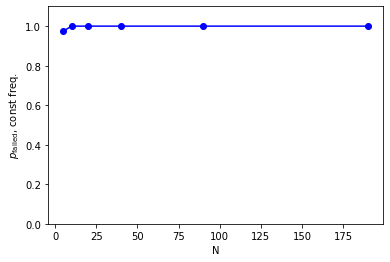

In [43]:
# Plot those data.

from matplotlib.pyplot import *
%matplotlib inline

plot(N_p[:,0], N_p[:,1], 'bo-')
xlabel('N')
ylabel(r'$p_{\rm failed}$, const freq.')
ylim(0., 1.1)

That's not a very interesting case!  We basically know right away that the machine failed; continuing to run is rather pointless.

Now try a case where the *nominal* defect rate is already pretty high, so it gets harder to distinguish the nominal and failure modes.

In [44]:
mf = MachineFailure(.3, .4, .1)
N_p = array([const_freq_update(mf, .4, N) for N in [5, 5, 10, 20, 50, 100]])
N_p

array([[5.00000000e+00, 1.10630942e-01],
       [1.00000000e+01, 1.22238553e-01],
       [2.00000000e+01, 1.48606043e-01],
       [4.00000000e+01, 2.15188743e-01],
       [9.00000000e+01, 4.58891335e-01],
       [1.90000000e+02, 8.90263498e-01]])

(0.0, 1.0)

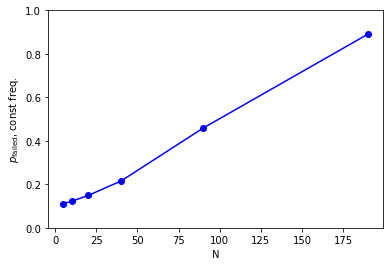

In [45]:
plot(N_p[:,0], N_p[:,1], 'bo-')
xlabel('N')
ylabel(r'$p_{\rm failed}$, const freq.')
ylim(0., 1.)

Here, as we run, we only gradually realize that the machine failed at startup.